# Using IBM Decision Optimization CPLEX (DOcplex) Modeling for Python

In [5]:
# https://github.com/IBMDecisionOptimization/docplex-examples/blob/master/examples/mp/jupyter/tutorials/Linear_Programming.ipynb
import sys
try:
    import cplex
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install cplex
    else:
        !pip install --user cplex

In [6]:
import sys
try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install docplex
    else:
        !pip install --user docplex

  Created wheel for docplex: filename=docplex-2.23.222-py3-none-any.whl size=662819 sha256=b27f935ea018671d93b8333e1031f86a725b00d14f9d9c8bd98bbcf245a948e8
  Stored in directory: c:\users\avitr\appdata\local\pip\cache\wheels\b9\32\a1\dc2abf92ec8b699d63a9a944f0f756ecdba8a7aad863376afb
Successfully built docplex


#### If either CPLEX or docplex where installed in the steps above, you will need to restart your jupyter kernel for the changes to be taken into account.

In [1]:
# first import the Model class from docplex.mp

import cplex
import docplex.mp
from docplex.mp.model import Model

In [15]:
# create one model instance, with a name
m = Model(name='Resource allocation', log_output=True)


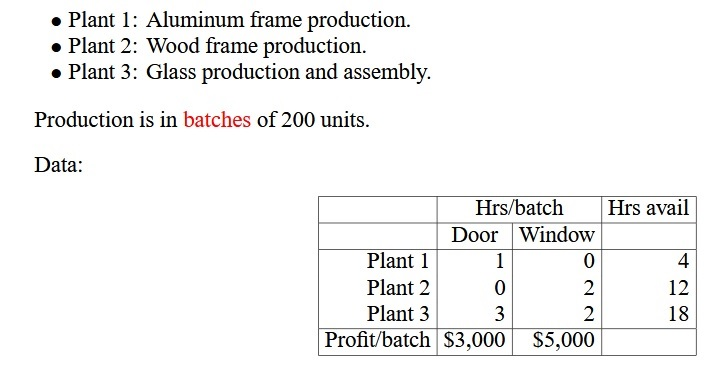


from :https://vanderbei.princeton.edu/542/lectures/lec1a.pdf

## Variables

In [16]:
# by default, all variables in Docplex have a lower bound of 0 and infinite upper bound
door = m.continuous_var(name='door')
window = m.continuous_var(name='window')

## Constraints

In [17]:
plant1 = m.add_constraint( 1 * door + 0 * window <= 4)
plant2 = m.add_constraint( 0 * door + 2 * window <= 12)
plant3 = m.add_constraint( 3 * door + 2 * window <= 18)
totalProduction = m.add_constraint( door +  window <= 200)


## Goals

In [18]:
m.maximize(3000 * door + 5000 * window)

## Solution

In [19]:
sol = m.solve()

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 3 rows and 0 columns.
Reduced LP has 1 rows, 2 columns, and 2 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =         36000.000000


In [20]:
sol.display()

solution for: Resource allocation
objective: 36000.000
door = 2.000
window = 6.000


#### Print information about the model
#### We can print information about the model to see how many objects of each type it holds:

In [21]:
m.print_information()

Model: Resource allocation
 - number of variables: 2
   - binary=0, integer=0, continuous=2
 - number of constraints: 4
   - linear=4
 - parameters: defaults
 - objective: maximize
 - problem type is: LP


In [22]:
m.print_solution()

objective: 36000.000
  door=2.000
  window=6.000


In [23]:
door.solution_value

2.0

In [24]:
window.solution_value

6.0

#### References
    https://medium.com/analytics-vidhya/python-api-of-docplex-for-solving-linear-programming-problems-6ab6f2e9b553
    https://mohamadkalil1.medium.com/solving-a-simple-linear-optimization-using-cplex-in-python-67d99d2591b4
